# Data Science Final Project: Part 2 Analysis

---



This is analysis of the rental data. In this file we will look at cleaning up the training data to reduce the MSE. Most of the work is in Data Exploration and Data preprocessing. 


1.   Data Exploration [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=K-ZZpcoaiGY6]
2.   Data Preprocessing [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=HgGR6M-aojEZ]
3.   Data Modelling [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=aPjrrxHJot6h]
4.  Summary of Results and Further Work [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=9IVaqCL3pKBX]





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [2]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

## Data Exploration

This section we look at the data and determine the features for our model. We build our training data




In [3]:
train_df.sample(5).transpose()

rental_id,7176649,7407586,7363522,7305208,7183885
addr_unit,#TWOL,#1J,#427,#C7,#4B
building_id,383854,1395931,349444,1293502,219274
bedrooms,2,3,1,2,3
bathrooms,1,2,1,1,2
size_sqft,0,1500,750,805,1362
created_at,2018-05-14 17:59:25,2018-07-25 16:49:58,2018-07-13 13:08:03,2018-06-25 15:12:52,2018-05-16 16:10:47
addr_street,180 MESEROLE STREET,68-60 108 STREET,250 NORTH 10 STREET,20-64 31 STREET,279 PROSPECT AVENUE
addr_city,Brooklyn,Forest Hills,Brooklyn,Astoria,Brooklyn
addr_zip,11206,11375,11211,11105,11215
addr_lat,40.708,40.7252,40.7174,40.7786,40.6637


In [4]:
train_df.shape

(12000, 38)

In [5]:
test_df.shape

(2000, 38)

In [6]:
submit1_df.shape

(2000, 38)

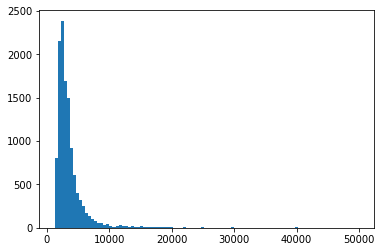

In [7]:
_ = plt.hist(train_df['rent'], bins=100)

In [8]:
train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

In [9]:
train_df['rent'].isna().sum()

0

In [10]:
print(list(train_df))

['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']


In [11]:
train_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [12]:
train_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
building_id,1.000000,-0.001813,-0.016501,-0.006433,0.064199,-0.008653,0.105315,0.117460,0.090194,-0.116488,...,-0.030651,0.099141,-0.012773,-0.060398,0.038340,0.064100,0.011357,-0.035145,0.052429,-0.003418
bedrooms,-0.001813,1.000000,0.464287,0.525537,0.187639,-0.114986,0.093089,0.142331,0.151078,-0.228858,...,0.117120,-0.116837,-0.085111,-0.202524,-0.091116,0.048234,-0.083456,0.353337,-0.004335,-0.158895
bathrooms,-0.016501,0.464287,1.000000,0.565788,-0.088524,0.028441,-0.062992,-0.100642,-0.106358,0.091489,...,0.298722,0.051650,0.102592,0.105276,0.089527,0.104741,0.111949,0.611987,-0.003053,0.116938
size_sqft,-0.006433,0.525537,0.565788,1.000000,0.000576,-0.037717,-0.035054,-0.013148,-0.011608,0.020547,...,0.263907,0.005959,0.026781,0.040962,0.051020,0.137652,0.068867,0.649984,-0.074162,0.054328
addr_zip,0.064199,0.187639,-0.088524,0.000576,1.000000,-0.577385,0.462277,0.950995,0.952018,-0.447352,...,-0.113234,-0.116047,-0.107670,-0.354300,-0.193333,-0.006699,-0.162588,-0.325241,-0.066025,-0.376063
addr_lat,-0.008653,-0.114986,0.028441,-0.037717,-0.577385,1.000000,0.219029,-0.429858,-0.424711,0.195647,...,0.013967,0.057687,-0.000782,0.146865,0.104243,0.000178,0.066387,0.109536,0.002401,0.170598
addr_lon,0.105315,0.093089,-0.062992,-0.035054,0.462277,0.219029,1.000000,0.554511,0.563806,-0.281790,...,-0.165555,-0.055615,-0.168426,-0.270704,-0.100606,-0.038981,-0.140828,-0.262711,-0.041091,-0.239193
bin,0.117460,0.142331,-0.100642,-0.013148,0.950995,-0.429858,0.554511,1.000000,0.994155,-0.426813,...,-0.119801,-0.089042,-0.112548,-0.323696,-0.182156,-0.007928,-0.144938,-0.332165,-0.111486,-0.350957
bbl,0.090194,0.151078,-0.106358,-0.011608,0.952018,-0.424711,0.563806,0.994155,1.000000,-0.442496,...,-0.137143,-0.109457,-0.135245,-0.346828,-0.193851,-0.021434,-0.169315,-0.339157,-0.126716,-0.367065
floor_count,-0.116488,-0.228858,0.091489,0.020547,-0.447352,0.195647,-0.281790,-0.426813,-0.442496,1.000000,...,0.177199,0.380581,0.361168,0.655252,0.498138,0.084536,0.395460,0.253517,0.185316,0.769707


In [13]:
# calculate correlation matrix
corr = train_df[["bedrooms", "bathrooms", "min_to_subway", "size_sqft", "floornumber", "year_built","has_doorman", "rent"]].corr()
corr

,bedrooms,bathrooms,min_to_subway,size_sqft,floornumber,year_built,has_doorman,rent
bedrooms,1.000000,0.464287,0.014171,0.525537,-0.158895,-0.056614,-0.233059,0.353337
bathrooms,0.464287,1.000000,0.017966,0.565788,0.116938,-0.004480,0.108987,0.611987
min_to_subway,0.014171,0.017966,1.000000,0.007718,-0.012333,-0.031395,-0.016984,0.000010
size_sqft,0.525537,0.565788,0.007718,1.000000,0.054328,-0.021524,0.047766,0.649984
floornumber,-0.158895,0.116938,-0.012333,0.054328,1.000000,0.095295,0.523314,0.267151
year_built,-0.056614,-0.004480,-0.031395,-0.021524,0.095295,1.000000,0.094629,-0.001037
has_doorman,-0.233059,0.108987,-0.016984,0.047766,0.523314,0.094629,1.000000,0.273486
rent,0.353337,0.611987,0.000010,0.649984,0.267151,-0.001037,0.273486,1.000000


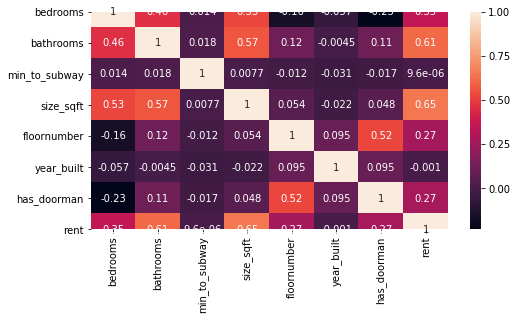

In [14]:
# visualize correlation matrix
plt.subplots(figsize=(8,4))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)



Note: Bedrooms has the highest correlation (positive) with rent

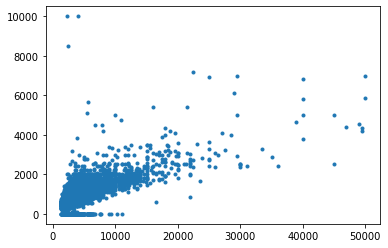

In [15]:
_ = plt.plot(train_df['rent'], train_df['size_sqft'], marker='.', linestyle='none')

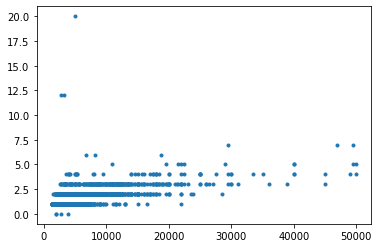

In [16]:
_ = plt.plot(train_df['rent'], train_df['bathrooms'], marker='.', linestyle='none')

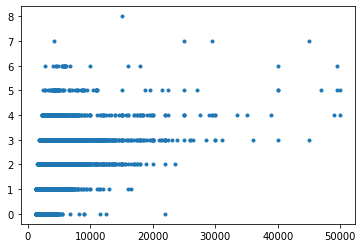

In [17]:
_ = plt.plot(train_df['rent'], train_df['bedrooms'], marker='.', linestyle='none')

In [18]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
train_features = train_df[feature_cols] 

Adding a new feature using existing data: Distance to Central Park. Idea: the closer to central park the more the rent. 

In [19]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm(lat1,lon1,lat2=40.78,lon2=-73.965):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [20]:
train_df['dist_centralPark'] = getDistanceFromLatLonInKm(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_centralPark'] = getDistanceFromLatLonInKm(test_df['addr_lat'], test_df['addr_lon'])

In [21]:
submit1_df['dist_centralPark'] = getDistanceFromLatLonInKm(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [22]:
train_df['dist_centralPark'].head(20)

rental_id
7236931    14.796742
7331920     7.806511
7139224     2.743952
7364827     3.660724
7242151    11.126183
7171210     2.331770
7286986     7.900183
7418503     2.803593
7304773     3.370226
7180240     2.530775
7199509     6.520788
7374106     7.727537
7211146     5.455471
7205032     9.249498
7303381     6.165054
7257553    10.045174
7371094     9.455008
7386616    19.309963
7161667     1.416285
7256881     1.781116
Name: dist_centralPark, dtype: float64

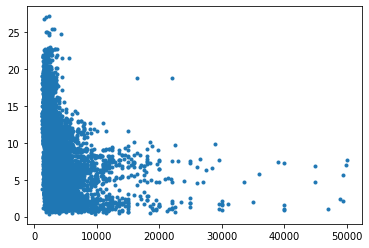

In [23]:
_ = plt.plot(train_df['rent'], train_df['dist_centralPark'], marker='.', linestyle='none')
#plt.xlim(0, 10000)
# not really a correlation

In [24]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm2(lat1,lon1,lat2=40.758,lon2=-73.9855):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [25]:
train_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(test_df['addr_lat'], test_df['addr_lon'])

In [26]:
submit1_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [27]:
train_df['dist_timeSquare'].head(20)

rental_id
7236931    12.529424
7331920     4.882349
7139224     1.535301
7364827     0.747939
7242151     9.213716
7171210     5.180434
7286986     8.966177
7418503     4.594814
7304773     1.008166
7180240     1.543220
7199509     7.190453
7374106     5.890000
7211146     8.381801
7205032     8.244336
7303381     9.016044
7257553     8.325541
7371094     7.129432
7386616    16.851094
7161667     2.554158
7256881     4.394017
Name: dist_timeSquare, dtype: float64

(0, 10000)

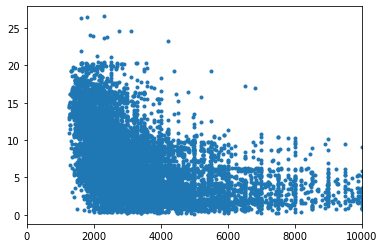

In [28]:
_ = plt.plot(train_df['rent'], train_df['dist_timeSquare'], marker='.', linestyle='none')
plt.xlim(0, 10000)
# not really a correlation

In [ ]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm3(lat1,lon1,lat2=40.7233,lon2=-74.0030):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [ ]:
train_df['dist_soho'] = getDistanceFromLatLonInKm3(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_soho'] = getDistanceFromLatLonInKm3(test_df['addr_lat'], test_df['addr_lon'])

In [ ]:
submit1_df['dist_soho'] = getDistanceFromLatLonInKm3(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [ ]:
train_df['dist_soho'].head(20)

In [ ]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm4(lat1,lon1,lat2=40.7163,lon2=-74.0086):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [ ]:
train_df['dist_tribeca'] = getDistanceFromLatLonInKm4(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_tribeca'] = getDistanceFromLatLonInKm4(test_df['addr_lat'], test_df['addr_lon'])

In [29]:
submit1_df['dist_tribeca'] = getDistanceFromLatLonInKm4(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [36]:
train_df['dist_tribeca'].head(20)

rental_id
7236931     8.726951
7331920     0.322072
7139224     5.553267
7364827     4.321828
7242151     6.658132
7171210    10.209016
7286986    11.536402
7418503     8.773459
7304773     5.115650
7180240     5.740384
7199509     9.625053
7374106     4.721426
7211146    13.407268
7205032     7.845390
7303381    14.042443
7257553     6.436983
7371094     4.054994
7386616    12.484447
7161667     7.163490
7256881     9.413691
Name: dist_tribeca, dtype: float64

In [37]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm5(lat1,lon1,lat2=40.7401,lon2=-73.9903):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [38]:
train_df['dist_flatiron_district'] = getDistanceFromLatLonInKm5(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_flatiron_district'] = getDistanceFromLatLonInKm5(test_df['addr_lat'], test_df['addr_lon'])

In [39]:
submit1_df['dist_flatiron_district'] = getDistanceFromLatLonInKm5(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [40]:
train_df['dist_flatiron_district'].head(20)

rental_id
7236931    10.663376
7331920     2.884739
7139224     2.559754
7364827     1.290306
7242151     7.601325
7171210     7.180027
7286986     9.411616
7418503     5.882679
7304773     2.426946
7180240     2.728485
7199509     7.512837
7374106     4.502831
7211146    10.364843
7205032     7.312777
7303381    11.026132
7257553     6.874995
7371094     5.307991
7386616    14.887315
7161667     4.129349
7256881     6.416783
Name: dist_flatiron_district, dtype: float64

In [41]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm6(lat1,lon1,lat2=40.7549,lon2=-73.9840):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [42]:
train_df['dist_mid_manhattan'] = getDistanceFromLatLonInKm6(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_mid_manhattan'] = getDistanceFromLatLonInKm6(test_df['addr_lat'], test_df['addr_lon'])

In [43]:
submit1_df['dist_mid_manhattan'] = getDistanceFromLatLonInKm6(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [44]:
train_df['dist_mid_manhattan'].head(20)

rental_id
7236931    12.168351
7331920     4.605374
7139224     1.382683
7364827     0.444551
7242151     8.846778
7171210     5.452516
7286986     8.816047
7418503     4.599955
7304773     1.283710
7180240     1.439928
7199509     7.011780
7374106     5.526294
7211146     8.643017
7205032     7.912035
7303381     9.297335
7257553     7.961852
7371094     6.767318
7386616    16.501794
7161667     2.621165
7256881     4.689244
Name: dist_mid_manhattan, dtype: float64

In [45]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark', 'dist_timeSquare', 'dist_soho',
    'dist_tribeca', 'dist_flatiron_district', 'dist_mid_manhattan'
]
train_features = train_df[feature_cols] 

In [46]:
# extract usable features for test data
test_features = test_df[feature_cols] 

In [47]:
corr = train_df[["bedrooms", "bathrooms", "min_to_subway", "size_sqft", "floornumber", "year_built","has_doorman", "rent",  "dist_centralPark", "dist_timeSquare", "dist_soho", "dist_tribeca", "dist_flatiron_district", "dist_mid_manhattan"]].corr()
corr

,bedrooms,bathrooms,min_to_subway,size_sqft,floornumber,year_built,has_doorman,rent,dist_centralPark,dist_timeSquare,dist_soho,dist_tribeca,dist_flatiron_district,dist_mid_manhattan
bedrooms,1.000000,0.464287,0.014171,0.525537,-0.158895,-0.056614,-0.233059,0.353337,0.141022,0.155523,0.092720,0.078145,0.131186,0.152196
bathrooms,0.464287,1.000000,0.017966,0.565788,0.116938,-0.004480,0.108987,0.611987,-0.057818,-0.067363,-0.060364,-0.058068,-0.060587,-0.065352
min_to_subway,0.014171,0.017966,1.000000,0.007718,-0.012333,-0.031395,-0.016984,0.000010,0.022934,0.016056,-0.005068,-0.010411,0.007472,0.015205
size_sqft,0.525537,0.565788,0.007718,1.000000,0.054328,-0.021524,0.047766,0.649984,0.028321,0.014559,-0.019804,-0.027519,0.003541,0.014234
floornumber,-0.158895,0.116938,-0.012333,0.054328,1.000000,0.095295,0.523314,0.267151,-0.258176,-0.321750,-0.226814,-0.207024,-0.283741,-0.316587
year_built,-0.056614,-0.004480,-0.031395,-0.021524,0.095295,1.000000,0.094629,-0.001037,-0.025043,-0.037718,-0.028661,-0.025778,-0.037596,-0.039073
has_doorman,-0.233059,0.108987,-0.016984,0.047766,0.523314,0.094629,1.000000,0.273486,-0.326067,-0.388177,-0.288483,-0.264997,-0.349748,-0.383485
rent,0.353337,0.611987,0.000010,0.649984,0.267151,-0.001037,0.273486,1.000000,-0.247304,-0.323942,-0.324047,-0.303952,-0.335823,-0.323957
dist_centralPark,0.141022,-0.057818,0.022934,0.028321,-0.258176,-0.025043,-0.326067,-0.247304,1.000000,0.908245,0.433986,0.308710,0.717555,0.889897
dist_timeSquare,0.155523,-0.067363,0.016056,0.014559,-0.321750,-0.037718,-0.388177,-0.323942,0.908245,1.000000,0.747965,0.647532,0.935598,0.998583


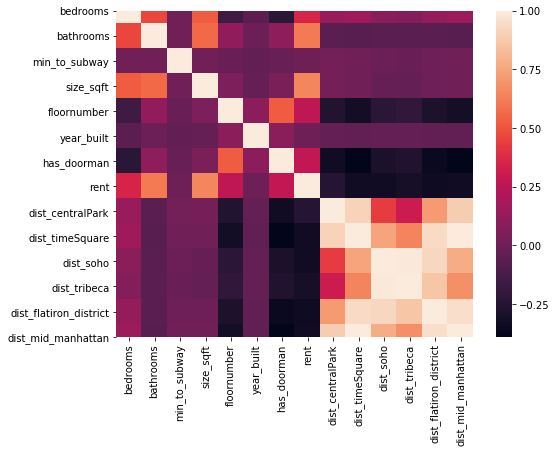

In [48]:

# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



## Data Preprocessing

This section we look at missing data and outliers and deal with these



#### 1. Missing Data
'min_to_subway', 'year_built' , 'floornumber' have NaNs. Solutions: drop or impute. This round we will impute as the feature 'floornumber' has 10% (1200) values missing and dropping this would reduce the data to only 10,000 points. 

In [49]:
train_df['year_built'].isna().sum()

403

In [50]:
train_df['min_to_subway'].isna().sum()

126

In [51]:
test_df.isna().sum()

addr_unit                  19
building_id                 0
bedrooms                    0
bathrooms                   0
size_sqft                   0
created_at                  0
addr_street                 0
addr_city                   0
addr_zip                    0
addr_lat                    0
addr_lon                    0
bin                         0
bbl                         0
floor_count                 0
year_built                 67
min_to_subway              17
has_doorman                 0
has_elevator                0
has_fireplace               0
has_dishwasher              0
is_furnished                0
has_gym                     0
allows_pets                 0
has_washer_dryer            0
has_garage                  0
has_roofdeck                0
has_concierge               0
has_pool                    0
has_garden                  0
has_childrens_playroom      0
rent                        0
no_fee                      0
description                 1
neighborho

In [52]:
train_df['floornumber'].isna().sum()

1277

In [53]:
train_df['floornumber'].describe()

count    10723.000000
mean         6.182738
std          7.671545
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         78.000000
Name: floornumber, dtype: float64

In [54]:
test_df['floornumber'].describe()

count    1775.000000
mean        6.291831
std         8.066341
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        71.000000
Name: floornumber, dtype: float64

In [55]:
train_df['min_to_subway'].describe()

count     11874.000000
mean         73.588716
std        2681.611157
min           0.016700
25%           1.616700
50%           2.750000
75%           4.366700
max      103343.616700
Name: min_to_subway, dtype: float64

In [56]:
test_df['min_to_subway'].describe()

count    1983.000000
mean        3.768095
std         4.110479
min         0.016700
25%         1.666700
50%         2.816700
75%         4.458350
max        57.583300
Name: min_to_subway, dtype: float64

In [57]:
train_df['year_built'].describe()

count    11597.000000
mean      1935.982668
std        158.157134
min          0.000000
25%       1915.000000
50%       1931.000000
75%       1987.000000
max       2019.000000
Name: year_built, dtype: float64

In [58]:
test_df['year_built'].describe()

count    1933.000000
mean     1934.515261
std       164.135048
min         0.000000
25%      1915.000000
50%      1931.000000
75%      1987.000000
max      2019.000000
Name: year_built, dtype: float64

The features all have large outliers that result in a much higher mean than median so we will use median for the impute value for the missing values. 

In [59]:
# impute missing values with medians
train_features = train_features.fillna(train_features.mean(), axis=0)

# construct target vector
train_target = train_df['rent']

#### 2. Outlier Data
From the above analysis it can be seen that the size_sqft and bathrooms have the value 0 for some data points. It is not possible for a rental space to have no size and it unusal for no bathroom in a rental. 

In [60]:
(train_features['size_sqft']==0).sum()
## 841 values have outlier value of 0 for size_sqft

841

In [61]:
train_features['size_sqft'].describe()

count    12000.000000
mean       850.465750
std        515.773101
min          0.000000
25%        610.000000
50%        800.000000
75%       1000.000000
max      10000.000000
Name: size_sqft, dtype: float64

In [62]:
train_features['size_sqft']= train_features['size_sqft'].replace(0,train_features['size_sqft'].mean())

In [63]:
 train_features.loc[train_features['size_sqft']==0, 'size_sqft']=300

In [64]:
train_features['size_sqft'].describe()

count    12000.000000
mean       910.069225
std        460.189182
min         79.000000
25%        675.000000
50%        850.000000
75%       1000.000000
max      10000.000000
Name: size_sqft, dtype: float64

In [65]:
(test_features['size_sqft']==0).sum()

174

In [66]:
 test_features.loc[test_features['size_sqft']==0, 'size_sqft']=300

c:\users\taimoor\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
(submit1_df['size_sqft']==0).sum()

177

In [68]:
(train_features['bathrooms']==0).sum()
## 4 values have outlier value of 0 for bathrooms...No bathrooms??

4

In [69]:
(test_features['bathrooms']==0).sum()

3

In [70]:
(train_features['bedrooms']==0).sum()
## 1556 values have outlier value of 0 for bedrooms...No bedrooms??Commercial rental?

1556

In [71]:
 train_features.loc[train_features['bedrooms']==0, 'bedrooms']=1

In [72]:
train_features['bedrooms'].describe()

count    12000.000000
mean         1.787333
std          0.921327
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64

In [73]:
no_bedrooms = train_df[train_df['bedrooms']==0]

In [74]:
no_bedrooms.head(10)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,borough,unit,floornumber,line,dist_centralPark,dist_timeSquare,dist_soho,dist_tribeca,dist_flatiron_district,dist_mid_manhattan
rental_id,,,,,,,,,,,,,,,,,,,,,
7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,...,Manhattan,406,4.0,06,7.806511,4.882349,0.760437,0.322072,2.884739,4.605374
7418503,#6G,18341149,0,1.0,500.0,2018-07-28 10:25:29,11-05 30 ROAD,Astoria,11102,40.771198,...,Queens,6G,6.0,G,2.803593,4.594814,7.896182,8.773459,5.882679,4.599955
7180240,#23B,69853,0,1.0,400.0,2018-05-15 17:04:06,250 EAST 54 STREET,New York,10022,40.757301,...,Manhattan,23B,23.0,B,2.530775,1.543220,4.836396,5.740384,2.728485,1.439928
7161667,#3C,78679,0,1.0,440.0,2018-05-09 13:51:48,1388 2 AVENUE,New York,10021,40.768289,...,Manhattan,3C,3.0,C,1.416285,2.554158,6.257117,7.163490,4.129349,2.621165
7179904,#28Q,52861,0,1.0,608.0,2018-05-15 16:05:48,322 WEST 57TH STREET,New York,10019,40.766800,...,Manhattan,28Q,28.0,Q,2.183633,0.984618,5.089674,5.979789,3.013039,1.323319
7279090,#30C,1474,0,1.0,500.0,2018-06-15 19:18:14,113 NASSAU STREET,New York,10038,40.710876,...,Manhattan,30C,30.0,C,8.474531,5.554455,1.429683,0.611941,3.553642,5.276388
7383331,#3C,31768,0,1.0,400.0,2018-07-19 14:06:44,88 HORATIO STREET,New York,10014,40.738499,...,Manhattan,3C,3.0,C,5.845420,2.857922,1.733875,2.469823,1.468283,2.697815
7423579,#2R,107200,0,1.0,350.0,2018-07-30 19:15:47,616 WEST 113 STREET,New York,10025,40.806323,...,Manhattan,2R,2.0,R,2.929543,5.607379,9.731207,10.620746,7.632464,5.905672
7416625,#1A,212458,0,1.0,600.0,2018-07-27 15:48:10,374 8 STREET,Brooklyn,11215,40.667969,...,Brooklyn,1A,1.0,A,12.545008,10.014025,6.388956,5.804837,8.046993,9.667031


In [75]:
(test_features['bedrooms']==0).sum()

264

In [76]:
test_features.loc[test_features['bedrooms']==0, 'bedrooms']=1

In [77]:
(submit1_df['bedrooms']==0).sum()

253

##### Large data points

In [78]:
o_df = train_df.loc[train_df.size_sqft>=8000]

In [79]:
o_df

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,borough,unit,floornumber,line,dist_centralPark,dist_timeSquare,dist_soho,dist_tribeca,dist_flatiron_district,dist_mid_manhattan
rental_id,,,,,,,,,,,,,,,,,,,,,
7410124,#47,18246988,2,1.0,8500.0,2018-07-25 20:14:29,180 72 STREET,Brooklyn,11209,40.633999,...,Brooklyn,47,47.0,NaN,17.153177,14.305187,10.200890,9.339331,12.279846,14.008280
7352536,#2,683038,2,1.0,10000.0,2018-07-10 18:03:07,1120 76 STREET,Brooklyn,11228,40.621860,...,Brooklyn,2,2.0,NaN,18.026849,15.303167,11.305622,10.505364,13.275444,14.981746
7148494,#3,1493896,5,1.0,9999.0,2018-05-04 17:04:02,801 WOODWARD AVENUE,Ridgewood,11385,40.703639,...,Queens,3,3.0,NaN,9.964682,9.205950,8.699408,9.003434,8.393060,8.886171


In [80]:
obd_df = train_df.loc[train_df.bedrooms> 6]
obd_df

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,borough,unit,floornumber,line,dist_centralPark,dist_timeSquare,dist_soho,dist_tribeca,dist_flatiron_district,dist_mid_manhattan
rental_id,,,,,,,,,,,,,,,,,,,,,
7204471,#1,205114,8,3.0,3500.0,2018-05-24 03:09:47,98 LINCOLN PLACE,Brooklyn,11217,40.676331,...,Brooklyn,1,1.0,NaN,11.570058,9.110862,5.671313,5.191368,7.181807,8.757631
7217803,#UPPER,20905,7,4.0,5000.0,2018-05-29 21:15:31,116 SULLIVAN STREET,New York,10012,40.726101,...,Manhattan,UPPER,NaN,NaN,6.790507,3.837968,0.311564,1.191010,1.884161,3.576317
7356136,NaN,71734,7,4.0,6950.0,2018-07-11 15:50:18,461 EAST 57 STREET,New York,10022,40.757728,...,Manhattan,NaN,NaN,NaN,2.501412,2.079118,5.223512,6.117854,3.163891,1.977768
7146658,NaN,56881,7,7.0,7000.0,2018-05-04 12:49:49,51 WEST 73 STREET,New York,10023,40.777983,...,Manhattan,NaN,NaN,NaN,1.070336,2.323677,6.450762,7.344339,4.349694,2.625732
7371637,#1,283312,7,2.0,1800.0,2018-07-16 16:27:49,1033A DE KALB AVENUE,Brooklyn,11221,40.693642,...,Brooklyn,1,1.0,NaN,9.959251,8.384776,6.711762,6.801873,7.034430,8.025079


In [81]:
obath_df = train_df.loc[train_df.bathrooms>=8]
obath_df
## Clearly row 7160572 of 12 bathrooms is an error as the description says 2 bed 2 bath
## row 7236325 also seems an error as there are only 2 bedrooms, most likely it should be 2 bath

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,borough,unit,floornumber,line,dist_centralPark,dist_timeSquare,dist_soho,dist_tribeca,dist_flatiron_district,dist_mid_manhattan
rental_id,,,,,,,,,,,,,,,,,,,,,
7236325,#7,87595,2,20.0,1200.0,2018-06-04 15:07:12,420 EAST 86 STREET,New York,10028,40.776358,...,Manhattan,7,NaN,NaN,1.414322,3.696479,7.454566,8.359724,5.330073,3.798398
7151821,#6,126724,3,12.0,1200.0,2018-05-06 20:10:38,821 RIVERSIDE DRIVE,New York,10032,40.835610,...,Manhattan,6,6.0,NaN,6.383994,9.243970,13.374523,14.271114,11.252127,9.523600
7160572,#D,951334,2,12.0,1069.0,2018-05-09 10:46:26,105 OCEANA DRIVE EAST,Brooklyn,11235,40.576302,...,Brooklyn,D,NaN,NaN,22.659068,20.341527,16.790220,16.153150,18.422548,19.984654


At this point we are going to just be mindful of the outliers. In Part 2 we may consider adjusting these but it will depend if they will have an impact upon the results. At the moment they are only a couple of points out of 12,000.

## Data Modelling 
This section we look at different models and model our training data

In [82]:
# training a linear regression model
lreg = LinearRegression()
lreg.fit(train_features, train_target)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(train_features, train_target)

c:\users\taimoor\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.mean(), axis=0)

In [84]:
# construct predictions for linear regression 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

3265570.2121609617

In [85]:
pd.DataFrame(lreg.coef_, index=feature_cols,  columns = ['Est. Coefficient'])

,Est. Coefficient
bedrooms,-10.962669
year_built,-0.064152
bathrooms,1161.560270
min_to_subway,-0.003285
size_sqft,3.393845
no_fee,-182.431463
has_doorman,781.299058
has_washer_dryer,327.662684
floornumber,37.277993
dist_centralPark,21.509645


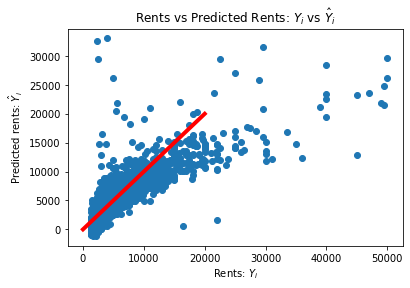

In [86]:
_ = plt.scatter(train_df['rent'], lreg.predict(train_features))
_ = plt.xlabel("Rents: $Y_i$")
_ = plt.ylabel("Predicted rents: $\hat{Y}_i$")
_ = plt.title("Rents vs Predicted Rents: $Y_i$ vs $\hat{Y}_i$")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

In [87]:
# construct predictions for random forest regression
test_df['predicted'] = rf.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

1839862.1320637246

In [88]:
# construct predictions for gradient boosting regression
test_df['predicted'] = gbt.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

1716402.768758501

## Summary of Results and Further Work
This section we look at the results of the modelling. Compare the results of the different models and then make decisions about further work to try improve the accuracy of our model in predicting the rents.

|        Model       |                  Description              |         MSE       |
|:-------------------|:-----------------------------------------:|------------------:|
|  Linear Regression |         NaN replaced with median    | 3149962.910345236|
|  Random Forrest    |            NaN replaced with median       | 1833051.7196996452 |
|  Linear Regression | NaN replaced with mean | 3148860.408871098|
|   Random Forrest   | NaN replaced with mean | 1835560.7531356928|
|  Linear Regression | Sqft 0 values set to mean in train | 3400583.9516334846|
|   Random Forrest   | Sqft 0 values set to mean in train | 1798566.6084322825|
|  Linear Regression | Sqft 0 values set to 300 in test and train | 3206089.0731793316|
|   Random Forrest   | Sqft 0 values set to 300 in test and train | 1804390.4514228716|
|  Linear Regression | Bedrooms 0 values set to 1 in test and train |3154388.2122088782 |
|   Random Forrest   | Bedrooms 0 values set to 1 in test and train |1987356.283059113 |

Notes about analysis:

SQft min of 300 was just an estimated guess for min value.

Changing min number of bedrooms from 0 to 1 increased the MSE for RF model and decreased the importance of the bedrooms feature from 2 to 1%. Dont recommend we do this as 0 bedroom represents studios in general looking at descriptions. 

In [89]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: size_sqft            Importance: 0.54
Variable: bathrooms            Importance: 0.14
Variable: dist_flatiron_district Importance: 0.14
Variable: year_built           Importance: 0.02
Variable: min_to_subway        Importance: 0.02
Variable: floornumber          Importance: 0.02
Variable: dist_timeSquare      Importance: 0.02
Variable: dist_soho            Importance: 0.02
Variable: dist_tribeca         Importance: 0.02
Variable: dist_mid_manhattan   Importance: 0.02
Variable: bedrooms             Importance: 0.01
Variable: has_doorman          Importance: 0.01
Variable: has_washer_dryer     Importance: 0.01
Variable: dist_centralPark     Importance: 0.01
Variable: no_fee               Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [90]:
train_df.to_csv('cleaned_data.csv', index = False)